In [ ]:
pip install geojson

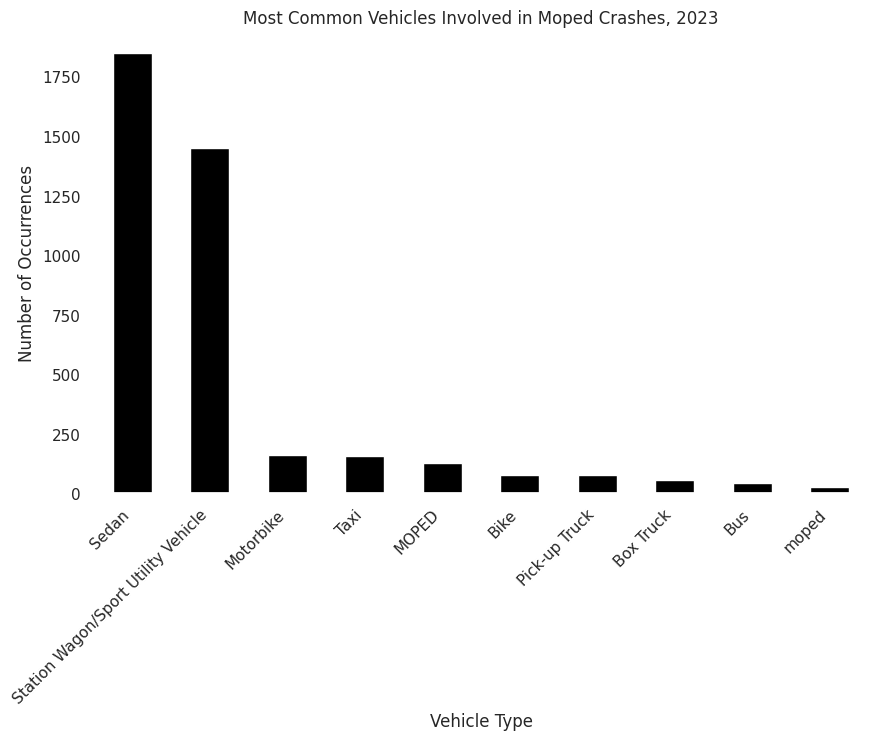

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Unspecified'),
  Text(1, 0, 'Driver Inattention/Distraction'),
  Text(2, 0, 'Failure to Yield Right-of-Way'),
  Text(3, 0, 'Passing or Lane Usage Improper'),
  Text(4, 0, 'Unsafe Speed'),
  Text(5, 0, 'Traffic Control Disregarded'),
  Text(6, 0, 'Following Too Closely'),
  Text(7, 0, 'Turning Improperly'),
  Text(8, 0, 'Driver Inexperience'),
  Text(9, 0, 'Other Vehicular')])

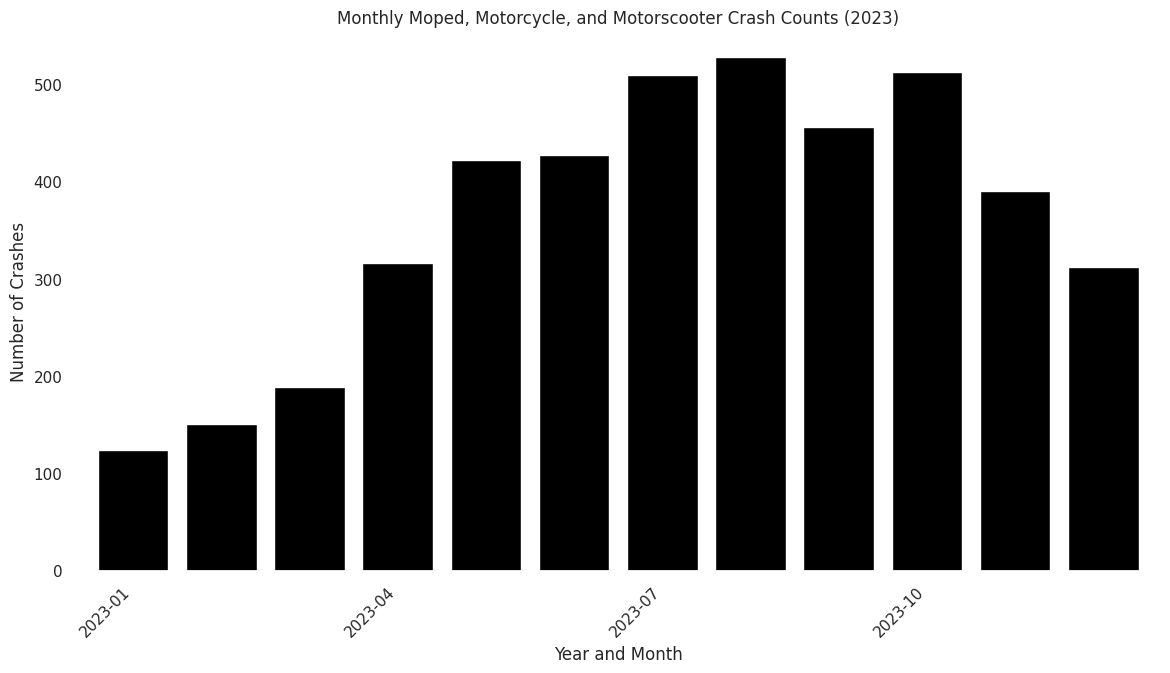

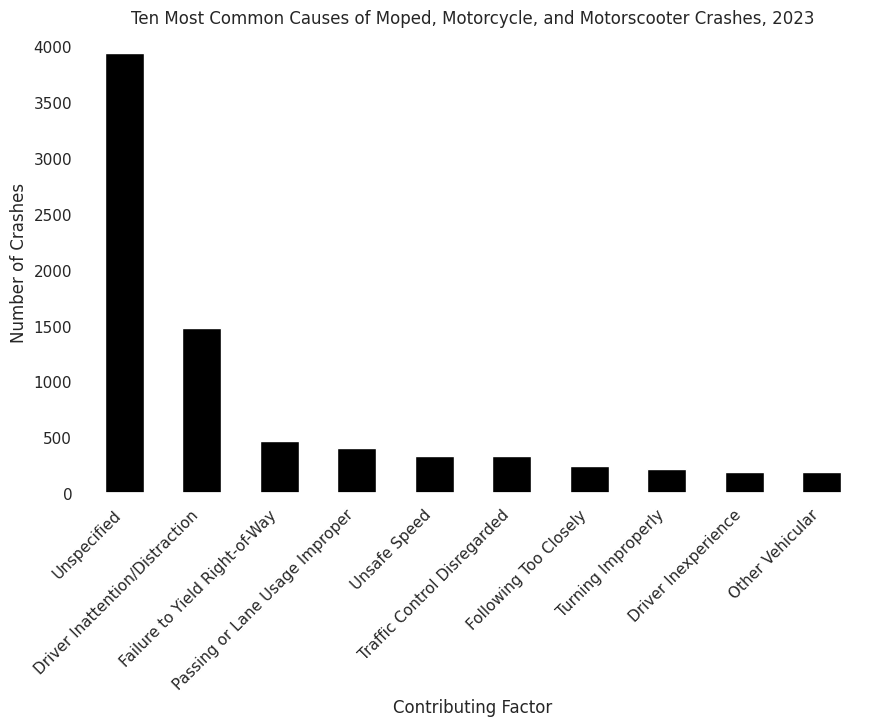

In [9]:
# Data for all following code aggregated from the City of New York:
#https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95/about_data

################################################################################

# Map of NYC Crashes Involving Mopeds, Motorcycles, and Motorscooters , April 2019-2024

import pandas as pd

#importing queried City of New York data:
moped_data = pd.read_csv('/content/moped_2023.csv')

import folium
from folium.plugins import HeatMap, MarkerCluster
import geopandas as gpd

#removing NaN values from lat/long data in spreadsheet
moped_data_cleaned = moped_data.dropna(subset=['LATITUDE', 'LONGITUDE'])

#setting location of map
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=10)

#heatmap

heat_data = [[row['LATITUDE'], row['LONGITUDE']] for index, row in moped_data_cleaned.iterrows()]
HeatMap(heat_data).add_to(nyc_map)

#initializing point cluster function in order to create clusters
point_cluster = MarkerCluster().add_to(nyc_map)

# initializing unique causes (eliminate double-counting causes in popup)
unique_causes = set()

# popups/markers loop
for index, row in moped_data_cleaned.iterrows():

    #removing null vehicle types from popup
    vehicle_types = [value for value in [row['VEHICLE TYPE CODE 1'], row['VEHICLE TYPE CODE 2'], row['VEHICLE TYPE CODE 3'], row['VEHICLE TYPE CODE 4'], row['VEHICLE TYPE CODE 5']] if pd.notnull(value)]

    #removing double-counted causes of the crash as well as NaN values for each crash:
    causes = []
    for column in ['CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5']:
        causes.extend([cause.strip() for cause in str(row[column]).split(',') if cause.strip() != 'nan'])
        #appending this data to unique causes
        unique_causes.update(causes)

    # creating popups for map with updated values from 'vehicle_types' and 'causes'
    popup_text = f"Vehicle Types: {', '.join(vehicle_types)}<br>Cause of Crash: {', '.join(set(causes))}"
    folium.Marker(location=[row['LATITUDE'], row['LONGITUDE']], popup=folium.Popup(popup_text, max_width=300)).add_to(point_cluster)

#Headers and credits
header_html = """
<h1 style ="text-align:center; font-size: 24px;">Map of NYC Crashes Involving Mopeds, Motorcycles, and Motorscooters, April 2019 - April 2024</h1>
"""
credits_html = """
<p style="text-align:center;">Map created by Mia Reiland with data from the City of New York
"""
# Add headers and credits and display the map
nyc_map.get_root().html.add_child(folium.Element(header_html))
nyc_map.get_root().html.add_child(folium.Element(credits_html))

nyc_map
nyc_map.save('nyc_map_v5.html')

################################################################################

### Bar graph of most common vehicle types crashing with Mopeds, Motorcycles, and Motorbikes

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='dark')

# concatenate vehicle type data, filter for non-moped, top ten, and count
# this needs adjustment — the data does not correctly reflect the crashes
vehicle_types = pd.concat([moped_data['VEHICLE TYPE CODE 1'],
                          moped_data['VEHICLE TYPE CODE 2'],
                          moped_data['VEHICLE TYPE CODE 3'],
                          moped_data['VEHICLE TYPE CODE 4'],
                          moped_data['VEHICLE TYPE CODE 5']])

non_moped = vehicle_types[~vehicle_types.isin(['Moped', 'Motorcycle', 'Motorscooter'])]
non_moped_counts = non_moped.value_counts()
top_ten_non_moped = non_moped_counts.head(10)

#plotting

plt.figure(figsize=(10, 6))
top_ten_non_moped.plot(kind='bar', color='black')
plt.gca().set_facecolor('none')
plt.title('Most Common Vehicles Involved in Moped Crashes, 2023')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45, ha='right')
plt.show()

################################################################################

### Bar graph reflecting in which months from 2019-2024 the most crashes occurred

moped_data['CRASH DATE'] = pd.to_datetime(moped_data['CRASH DATE'], format='%m/%d/%y')

moped_data['CRASH DATE'] = moped_data['CRASH DATE'].dt.to_period('M')
crashes_by_month = moped_data['CRASH DATE'].value_counts().sort_index()


#plotting

plt.figure(figsize=(14, 7))
crashes_by_month.plot(kind='bar', color='black', width=0.8)
plt.gca().set_facecolor('none')
plt.title('Monthly Moped, Motorcycle, and Motorscooter Crash Counts (2023)')
plt.xlabel('Year and Month')
plt.ylabel('Number of Crashes')
n = 3
plt.xticks(range(0, len(crashes_by_month), n), crashes_by_month.index[::n], rotation=45, ha='right')
#plt.show()

################################################################################

### Most Common Contributing Factors to Crashes

contributing_factors = pd.concat([moped_data['CONTRIBUTING FACTOR VEHICLE 1'],
                          moped_data['CONTRIBUTING FACTOR VEHICLE 2'],
                          moped_data['CONTRIBUTING FACTOR VEHICLE 3'],
                          moped_data['CONTRIBUTING FACTOR VEHICLE 4'],
                          moped_data['CONTRIBUTING FACTOR VEHICLE 5']])
contributing_factors_counts = contributing_factors.value_counts()
top_ten_contributing = contributing_factors_counts.head(10)

plt.figure(figsize=(10, 6))
top_ten_contributing.plot(kind='bar', color='black')
plt.gca().set_facecolor('none')
plt.title('Ten Most Common Causes of Moped, Motorcycle, and Motorscooter Crashes, 2023')
plt.xlabel('Contributing Factor')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45, ha='right')
#plt.show()



################################################################################



